In [1]:
!pip install lifelines
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
import scipy.stats as stats
import seaborn as sns
from scipy.stats import f_oneway
import statsmodels.api as sm
from scipy.stats import chi2_contingency
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from lifelines import KaplanMeierFitter
from statsmodels.formula.api import ols
import numpy as np
from scipy.stats import skew, kurtosis

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 7.1 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=41825731d6a3c28b82e8bb7b5d4c34f8dbfefce878b85ec7ab1a7b196c888c95
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [2]:
# Load the data from the Excel file
df = pd.read_excel('/content/MHD.xlsx')

# View the column names
column_names = df.columns
print(column_names)

Index(['Year', 'Funding levels', 'staffing levels', 'Patient outcome',
       'Emergency referall', 'Discharges', 'Associated emergency readmissions',
       'Urgent crisis referalls', 'Access_to_care_waiting_time', 'Geographic',
       'Geographic-1', 'Gender', 'Age', 'Indicator_value_patient_satisfaction',
       'Indicator_value_Policy_changes', 'Region'],
      dtype='object')


In [3]:
import pandas as pd

# Load the data
df = pd.read_excel('/content/MHD.xlsx')

# Check for missing values
missing_values = df.isnull().sum()

# Display missing values
print(missing_values)


Year                                    254
Funding levels                           60
staffing levels                           1
Patient outcome                           1
Emergency referall                        1
Discharges                              228
Associated emergency readmissions       228
Urgent crisis referalls                   1
Access_to_care_waiting_time             162
Geographic                                0
Geographic-1                              0
Gender                                  339
Age                                     332
Indicator_value_patient_satisfaction    100
Indicator_value_Policy_changes            0
Region                                    0
dtype: int64


In [4]:
print(df.dtypes)


Year                                    float64
Funding levels                          float64
staffing levels                          object
Patient outcome                          object
Emergency referall                      float64
Discharges                              float64
Associated emergency readmissions       float64
Urgent crisis referalls                 float64
Access_to_care_waiting_time             float64
Geographic                               object
Geographic-1                             object
Gender                                   object
Age                                     float64
Indicator_value_patient_satisfaction     object
Indicator_value_Policy_changes            int64
Region                                   object
dtype: object


In [5]:
pip install fancyimpute


  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 12.5 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29879 sha256=7bf5f509b7cc39fec4bf327944d31629df44c0c5250fe49e8c32c2bc1b680ad3
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11329 sha256=cbf7650a56f0ec6eb780d4fd36af2f9425bed3b1164e2c478f3234b59c872e58
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


In [6]:
import pandas as pd
from fancyimpute import KNN

# Load data (assuming you've done this already)
# df = pd.read_excel('/content/MHD.xlsx')

# Select only numeric columns for KNN imputation
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Apply KNN imputation
df[numeric_cols] = KNN(k=5).fit_transform(df[numeric_cols])

# If you want to convert specific columns back to integers (like Year, if it doesn't have decimal points)
df['Year'] = df['Year'].astype(int)

# Check the result to ensure missing values are filled
print(df.isnull().sum())


Imputing row 1/354 with 0 missing, elapsed time: 0.113
Imputing row 101/354 with 2 missing, elapsed time: 0.120
Imputing row 201/354 with 5 missing, elapsed time: 0.138
Imputing row 301/354 with 6 missing, elapsed time: 0.166
Year                                      0
Funding levels                            0
staffing levels                           1
Patient outcome                           1
Emergency referall                        0
Discharges                                0
Associated emergency readmissions         0
Urgent crisis referalls                   0
Access_to_care_waiting_time               0
Geographic                                0
Geographic-1                              0
Gender                                  339
Age                                       0
Indicator_value_patient_satisfaction    100
Indicator_value_Policy_changes            0
Region                                    0
dtype: int64


In [7]:
# Fill missing values for object columns with their mode
object_cols = df.select_dtypes(include=['object']).columns.tolist()

for col in object_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Check again for missing values to ensure all are filled
print(df.isnull().sum())


Year                                    0
Funding levels                          0
staffing levels                         0
Patient outcome                         0
Emergency referall                      0
Discharges                              0
Associated emergency readmissions       0
Urgent crisis referalls                 0
Access_to_care_waiting_time             0
Geographic                              0
Geographic-1                            0
Gender                                  0
Age                                     0
Indicator_value_patient_satisfaction    0
Indicator_value_Policy_changes          0
Region                                  0
dtype: int64


<ipython-input-7-0ba443bfe914>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [10]:
import pandas as pd

# Assuming df is already defined with your data
# Create an initial summary DataFrame with descriptive statistics
summary = df.describe()

# Filter only numeric columns for skewness and kurtosis calculations
numeric_df = df.select_dtypes(include=['number'])

# Calculate skewness and kurtosis only on numeric data and add them to the summary
summary.loc['skew'] = numeric_df.skew()
summary.loc['kurtosis'] = numeric_df.kurtosis()

print(summary)

                 Year  Funding levels  Emergency referall    Discharges  \
count      354.000000      354.000000          354.000000    354.000000   
mean      1978.624294        7.276817           35.728814  21457.193911   
std         22.288034        5.054388          244.287053   8051.211532   
min       1923.000000        0.000000            0.000000   7225.000000   
25%       1961.000000        4.000000            0.000000  16565.052518   
50%       1985.000000        6.000000            0.000000  19837.574181   
75%       1996.000000        9.000000           20.000000  24727.081821   
max       2022.000000       29.000000         4315.000000  72225.000000   
skew        -0.432131        1.649062           15.787934      1.943506   
kurtosis    -0.670825        3.147707          270.660608      7.243753   

          Associated emergency readmissions  Urgent crisis referalls  \
count                            354.000000               354.000000   
mean                          

In [11]:
import pandas as pd

# Provided skewness and kurtosis data
data = {
    'Variables': ['Year', 'Funding levels', 'Emergency referall', 'Discharges', 'Associated emergency readmissions', 'Urgent crisis referalls', 'Access_to_care_waiting_time', 'Age', 'Indicator_value_Policy_changes'],
    'Skewness': [-0.432131, 1.649062, 15.787934, 1.943506, 1.919500, 17.847162, 1.836514, 0.621923, 1.773470],
    'Kurtosis': [-0.670825, 3.147707, 270.660608, 7.243753, 9.117574, 329.307648, 4.825249, 1.239451, 3.566629]
}

# Creating the DataFrame
df_skew_kurtosis = pd.DataFrame(data)

# Displaying the table
print(df_skew_kurtosis)


                           Variables   Skewness    Kurtosis
0                               Year  -0.432131   -0.670825
1                     Funding levels   1.649062    3.147707
2                 Emergency referall  15.787934  270.660608
3                         Discharges   1.943506    7.243753
4  Associated emergency readmissions   1.919500    9.117574
5            Urgent crisis referalls  17.847162  329.307648
6        Access_to_care_waiting_time   1.836514    4.825249
7                                Age   0.621923    1.239451
8     Indicator_value_Policy_changes   1.773470    3.566629


In [12]:
from scipy.stats import shapiro

# Test of normality using Shapiro-Wilk
for column in df.select_dtypes(include=['float64', 'int64']):
    stat, p = shapiro(df[column].dropna()) # dropna to avoid NaN values
    print(f"\nShapiro-Wilk Test for {column}:")
    print(f"Statistic = {stat:.5f}, p-value = {p:.5f}")
    if p > 0.05:
        print(f"{column} looks Gaussian (fail to reject H0)")
    else:
        print(f"{column} does not look Gaussian (reject H0)")



Shapiro-Wilk Test for Year:
Statistic = 0.96185, p-value = 0.00000
Year does not look Gaussian (reject H0)

Shapiro-Wilk Test for Funding levels:
Statistic = 0.85103, p-value = 0.00000
Funding levels does not look Gaussian (reject H0)

Shapiro-Wilk Test for Emergency referall:
Statistic = 0.10555, p-value = 0.00000
Emergency referall does not look Gaussian (reject H0)

Shapiro-Wilk Test for Discharges:
Statistic = 0.87052, p-value = 0.00000
Discharges does not look Gaussian (reject H0)

Shapiro-Wilk Test for Associated emergency readmissions:
Statistic = 0.88639, p-value = 0.00000
Associated emergency readmissions does not look Gaussian (reject H0)

Shapiro-Wilk Test for Urgent crisis referalls:
Statistic = 0.09186, p-value = 0.00000
Urgent crisis referalls does not look Gaussian (reject H0)

Shapiro-Wilk Test for Access_to_care_waiting_time:
Statistic = 0.85002, p-value = 0.00000
Access_to_care_waiting_time does not look Gaussian (reject H0)

Shapiro-Wilk Test for Age:
Statistic = 0.

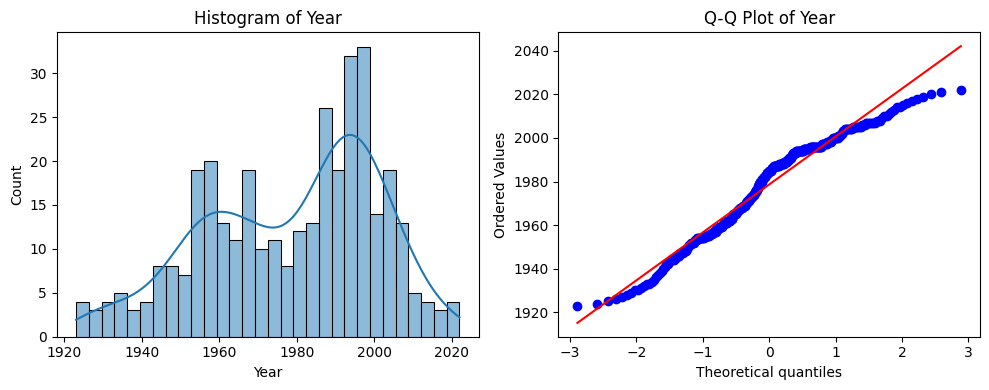

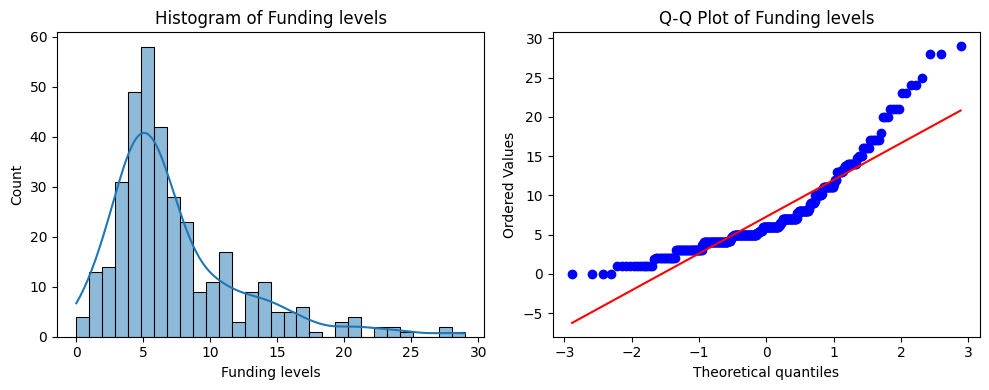

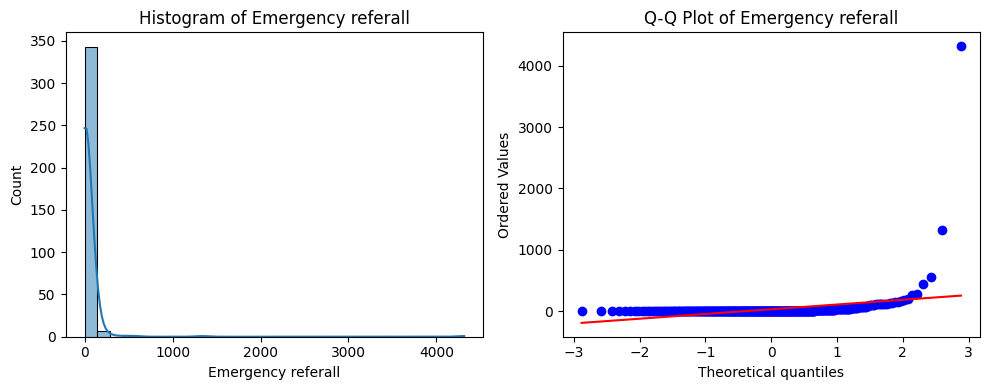

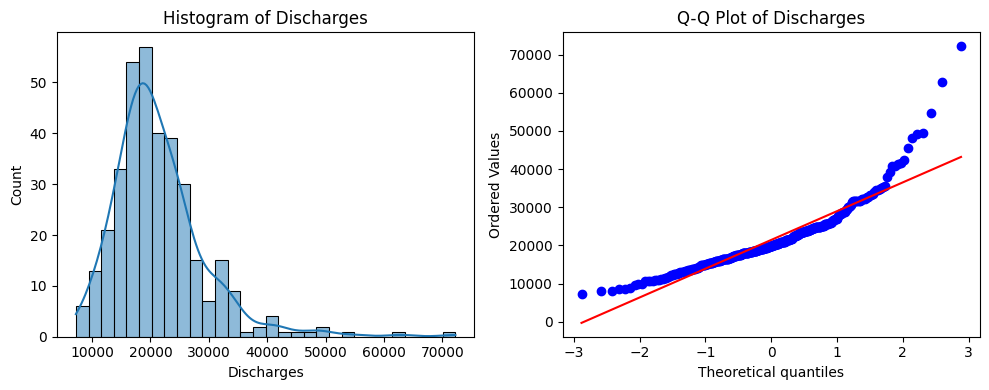

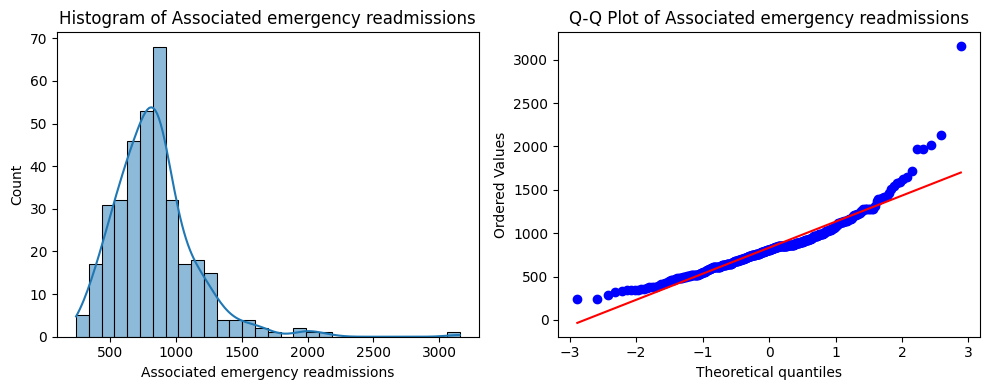

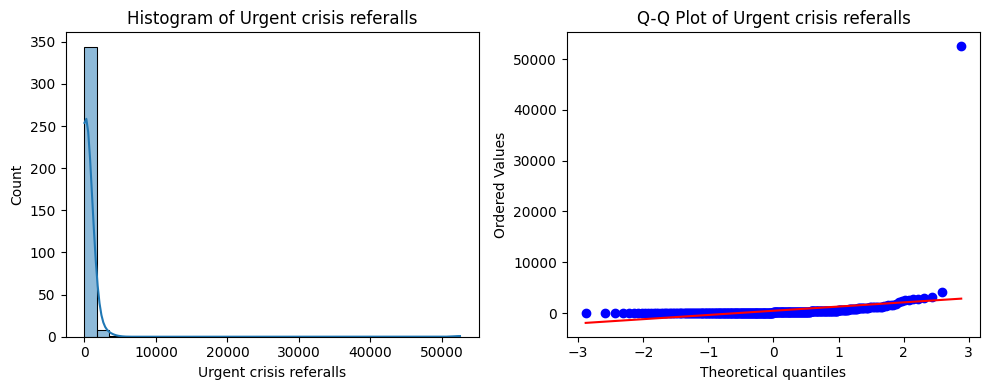

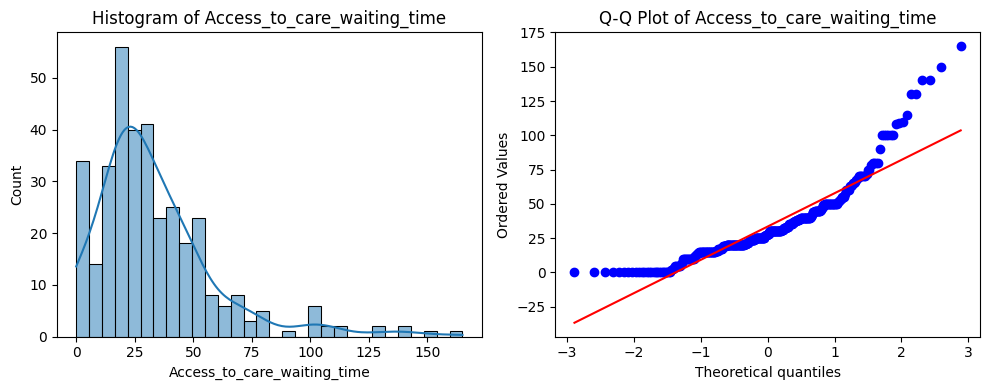

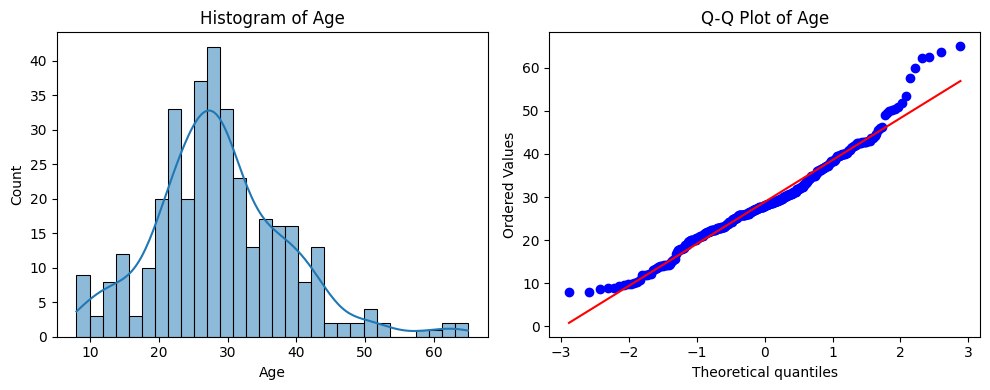

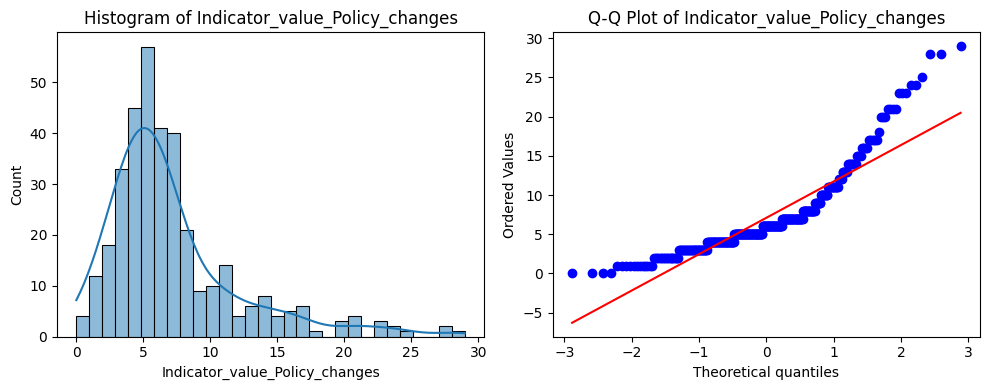

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot

columns = [
    "Year", "Funding levels", "Emergency referall", "Discharges",
    "Associated emergency readmissions", "Urgent crisis referalls",
    "Access_to_care_waiting_time", "Age", "Indicator_value_Policy_changes"
]

for column in columns:
    plt.figure(figsize=(10, 4))  # Increased the figure size for better readability

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f"Histogram of {column}")

    # Q-Q plot
    plt.subplot(1, 2, 2)
    probplot(df[column].dropna(), plot=plt)
    plt.title(f"Q-Q Plot of {column}")

    plt.tight_layout()
    plt.show()

In [16]:
# Convert float and int columns directly
for col in ['Year', 'Funding levels', 'Emergency referall', 'Discharges', 'Associated emergency readmissions', 'Urgent crisis referalls', 'Access_to_care_waiting_time', 'Age', 'Indicator_value_Policy_changes']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Convert object columns to category codes
for col in ['staffing levels', 'Patient outcome', 'Geographic', 'Geographic-1', 'Gender', 'Indicator_value_patient_satisfaction', 'Region']:
    df[col] = df[col].astype('category').cat.codes


In [17]:
import statsmodels.api as sm

# Ensure that missing values are dropped
df_clean = df.dropna(subset=['Funding levels', 'Patient outcome'])

# Define your independent variable(s) (X) and dependent variable (y)
X = df_clean[['Funding levels']]
X = sm.add_constant(X)  # Add a constant (intercept)
y = df_clean['Patient outcome']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        Patient outcome   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9038
Date:                Sat, 02 Nov 2024   Prob (F-statistic):              0.342
Time:                        06:11:31   Log-Likelihood:                -2020.9
No. Observations:                 354   AIC:                             4046.
Df Residuals:                     352   BIC:                             4054.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            114.7158      6.822     16.

In [18]:
# Replace missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imputed)

# Apply PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_scaled)

# Create a DataFrame to hold the results
pca_df = pd.DataFrame(data=principalComponents, columns=['Principal Component 1', 'Principal Component 2'])

# Add the 'Region' column from the original dataset to the PCA results
pca_df['Region'] = df['Region']

# Display the PCA results
print("PCA Results:")
print(pca_df.head())


PCA Results:
   Principal Component 1  Principal Component 2  Region
0               3.163174              23.349239       1
1              -1.423630               1.532908       2
2               1.951507               0.655865       0
3              -0.257612               1.268064       3
4               5.587437              -0.628698       1
